In [ ]:
%cd ../../..

In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
df = pd.read_csv('data/shopee_crop_yolo/cropped_dataset.csv')

In [ ]:
df

In [ ]:
import ast
df['cropped_img_paths'] = df['cropped_img_paths'].apply(ast.literal_eval)

In [ ]:
df['len'] = df.cropped_img_paths.apply(len)
df

In [ ]:
filtered_images = df[df['len'] == 0].images
filtered_images

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plot_images = filtered_images.iloc[:50]

plt.figure(figsize=(20, 20))
for i, img in enumerate(plot_images):
    plt.subplot(10, 5, i + 1)
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()

Analyze label of cropped images

In [29]:
df = pd.read_csv('data/shopee_crop_yolo/database.txt', sep=' ', header=None, names=['image', 'label'])

In [30]:
df

,image,label
0,data/shopee_crop_yolo/images/6460ab0252e365505...,24
1,data/shopee_crop_yolo/images/6460ab0252e365505...,24
2,data/shopee_crop_yolo/images/6460ab0252e365505...,24
3,data/shopee_crop_yolo/images/6460ab0252e365505...,24
4,data/shopee_crop_yolo/images/6460ab0252e365505...,24
...,...,...
1347831,data/shopee_crop_yolo/images/6462d71a614eb2054...,31
1347832,data/shopee_crop_yolo/images/6462d71a614eb2054...,31
1347833,data/shopee_crop_yolo/images/6462d71a614eb2054...,31
1347834,data/shopee_crop_yolo/images/6462d71a614eb2054...,31


In [31]:
import json
with open('data/shopee/cls_to_idx.json') as f:
    cls_to_idx = json.load(f)

In [32]:
idx_to_cls = cls_to_idx['idx_to_cls']
idx_to_cls = {int(k): v for k, v in idx_to_cls.items()}

In [33]:
df['cls'] = df.label.apply(lambda x: idx_to_cls[x])
df

,image,label,cls
0,data/shopee_crop_yolo/images/6460ab0252e365505...,24,Thời Trang Nữ > Áo > Khác
1,data/shopee_crop_yolo/images/6460ab0252e365505...,24,Thời Trang Nữ > Áo > Khác
2,data/shopee_crop_yolo/images/6460ab0252e365505...,24,Thời Trang Nữ > Áo > Khác
3,data/shopee_crop_yolo/images/6460ab0252e365505...,24,Thời Trang Nữ > Áo > Khác
4,data/shopee_crop_yolo/images/6460ab0252e365505...,24,Thời Trang Nữ > Áo > Khác
...,...,...,...
1347831,data/shopee_crop_yolo/images/6462d71a614eb2054...,31,Thời trang trẻ em & trẻ sơ sinh > Quần áo bé t...
1347832,data/shopee_crop_yolo/images/6462d71a614eb2054...,31,Thời trang trẻ em & trẻ sơ sinh > Quần áo bé t...
1347833,data/shopee_crop_yolo/images/6462d71a614eb2054...,31,Thời trang trẻ em & trẻ sơ sinh > Quần áo bé t...
1347834,data/shopee_crop_yolo/images/6462d71a614eb2054...,31,Thời trang trẻ em & trẻ sơ sinh > Quần áo bé t...


In [34]:
ddf = df[['image', 'cls']]

In [35]:
clss = ddf.groupby('cls')

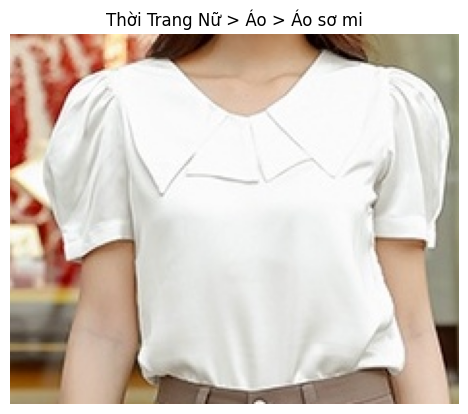

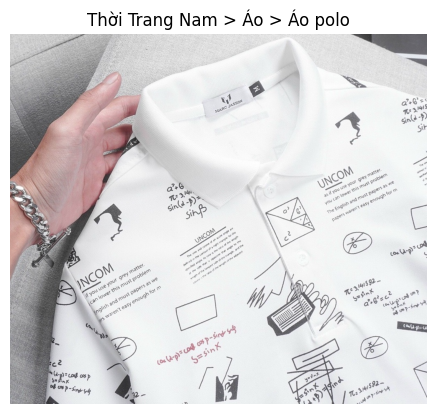

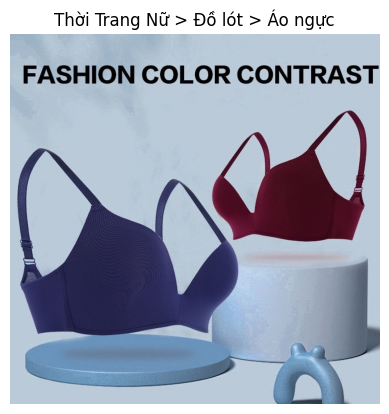

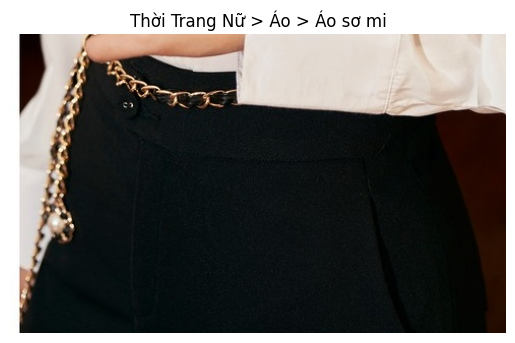

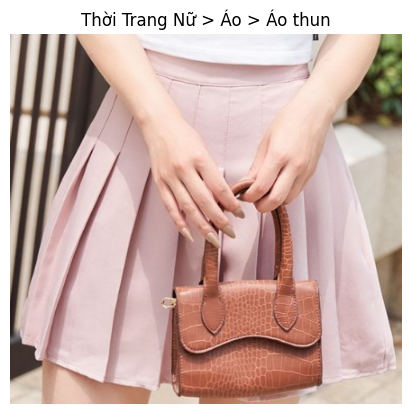

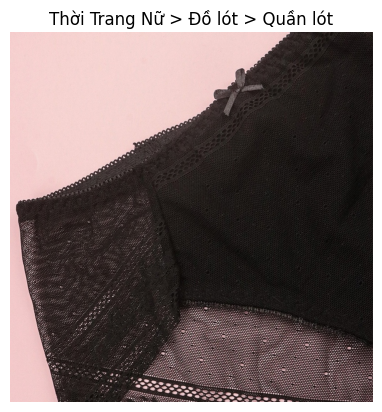

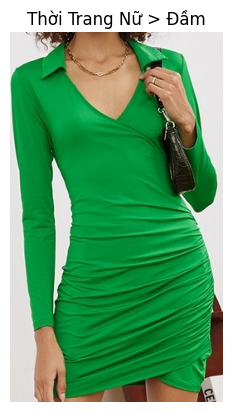

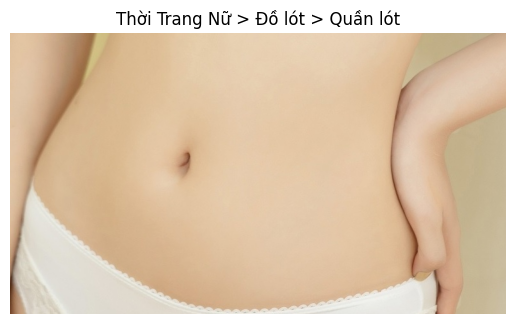

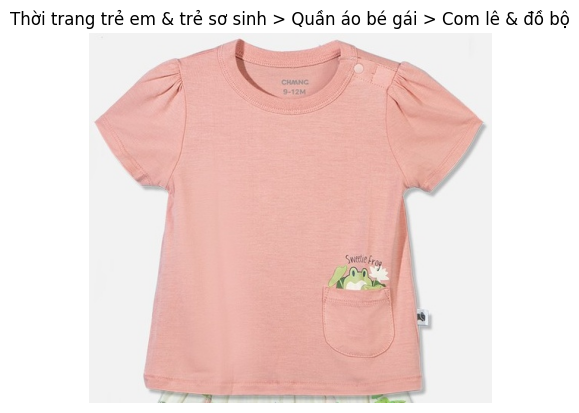

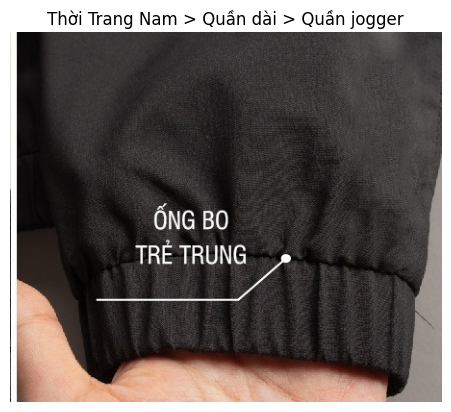

In [44]:
# plot
ddf = ddf.sample(frac=1)
ddf.reset_index(drop=True, inplace=True)
plt.tight_layout()
for i in range(10):
    # plt.subplot(10, 1, i+1)
    img = ddf.iloc[i]['image']
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title(ddf.iloc[i]['cls'])
    plt.imshow(img)
    plt.axis("off")
    plt.show()